<a href="https://www.kaggle.com/code/andrey36912/notebook47c5a8c0bb?scriptVersionId=194946953" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [10]:
df1 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/business_data.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/education_data.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/entertainment_data.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/sports_data.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/technology_data.csv")

In [11]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [12]:
X = df['headlines']  
y = df['category']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [14]:
class MyTokenizer:
    def __init__(self):
        self.some_args = None

    def __call__(self, text):
        return text.split()

In [15]:
vectorizer = TfidfVectorizer(tokenizer=MyTokenizer(), stop_words='english')

In [16]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [17]:
pca = TruncatedSVD(n_components=min(1287, X_train_tfidf.shape[1]))

In [18]:
X_train_reduced = pca.fit_transform(X_train_tfidf)
X_test_reduced = pca.transform(X_test_tfidf)

print("Размерность после SVD:", X_train_reduced.shape, X_test_reduced.shape)

Размерность после SVD: (8000, 1287) (2000, 1287)


In [19]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_reduced, y_train)

LogisticRegression(class_weight='balanced')

In [20]:
y_pred_train = model.predict(X_train_reduced) 
y_pred = model.predict(X_test_reduced)

In [21]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

In [22]:
classification_report(y_test, y_pred)

'               precision    recall  f1-score   support\n\n     business       0.91      0.91      0.91       410\n    education       0.97      0.92      0.94       393\nentertainment       0.93      0.90      0.92       395\n       sports       0.89      0.93      0.91       415\n   technology       0.87      0.90      0.89       387\n\n     accuracy                           0.91      2000\n    macro avg       0.91      0.91      0.91      2000\n weighted avg       0.91      0.91      0.91      2000\n'

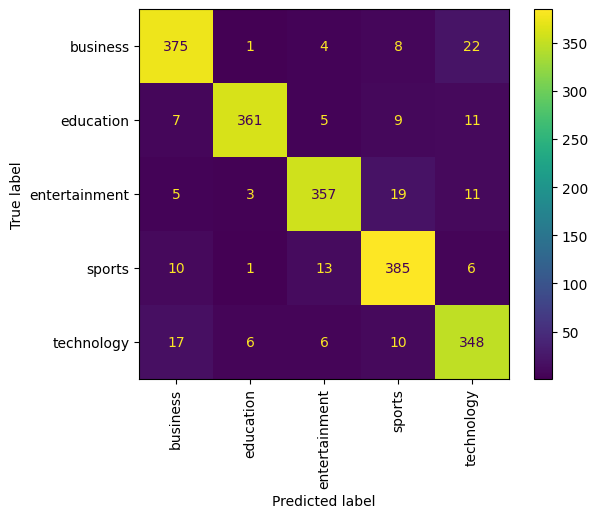

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model.classes_)
plt.xticks(rotation=90)
plt.show()

In [24]:
def plot_metric(train_metric, test_metric, name):
    plt.figure(figsize=(8, 5))
    plt.title(f"Model {name} on Train and Test Sets")
    plt.bar(['Train', 'Test'], [train_metric, test_metric], color=['blue', 'orange'])
    plt.ylabel(name)
    plt.show()

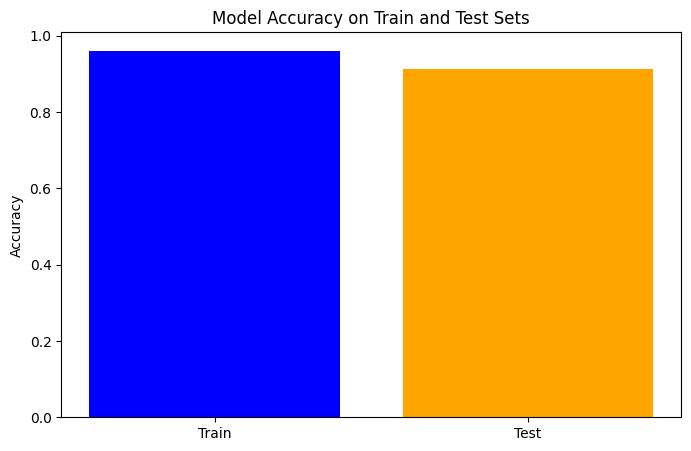

In [25]:
plot_metric(train_accuracy, test_accuracy, 'Accuracy')